# **Lab #3: Quantum Key Distribution** <br>
## **Microsoft Winter School, February 11th 2023**

### **Summary**

In today's lab, we are going to implement the Quantum Key Distribution protocol BB84 in Q#.

<br>

### **Learning Objectives**
* See how to run the same code with the local simulator, execute on a simulator, and excecute on real quantum hardware.
* See how BB84 can be implemented in code.
* Become familiar with the roles that Alice, Bob, and Eve all play in this protocol.

## **Part #0: Imports**
---

**Run the code below to open the necessary namespaces.**

In [2]:
from matplotlib import pyplot
import numpy as np
from random import choices
import json

import qsharp.azure
import qsharp


targets = qsharp.azure.connect(
   resourceId="/subscriptions/c279c616-1c9b-46c2-a843-380394620c72/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/qxqwinterschoolSamithaRanasinghe",
   location="eastus"
)


# Connect to available targets
# if you start typing qsharp - you should get a pop-up that inserts this "connect" command
#targets = qsharp.azure.connect(
#    resourceId="ENTER YOUR RESOURCE ID",
#    location="ENTER YOUR LOCATION")


# Set the target to ionq.simulator
qsharp.azure.target("ionq.simulator")


# Helper function to pick one result according to the distribution of all results
def pickResult(results):

    probs = list(results.values())
    bits = choices(list(results.keys()), weights = probs)[0]

    return json.loads(bits)

Preparing Q# environment...


Connecting to Azure Quantum...

Authenticated using Microsoft.Azure.Quantum.Authentication.TokenFileCredential


Connected to Azure Quantum workspace qxqwinterschoolSamithaRanasinghe in location eastus.
Loading package Microsoft.Quantum.Providers.IonQ and dependencies...
Active target is now ionq.simulator


In [3]:
%%qsharp

open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Random;
open Microsoft.Quantum.Convert;

## **Part 1: Warm-up**
---

Let's warm up with some review of Q#.

### **Exercise #1: Creating Q# Operations (Practice Together)**

Let's start by reminding ourselves of some basic Q# rules regarding **operations**:
* All Q# code has to be embedded in operations.
* Operations can have arguments that are specified in parenthesis.
* Operations must have a return type. However, you can return `Unit`, which means _nothing is returned_.

Let's create an operation called `AddTwoVariables` that takes in two `Int` arguments, returns an `Int`. This operation will **return the sum of its arguments.**

In [4]:
# remember, we need to declare the operation in Python first.
AddTwoVariables : any = None

In [5]:
%%qsharp
operation AddTwoVariables (a : Int, b : Int) : Int {
    return a + b;
}

In [6]:
# we can run this operation by using simulate command
AddTwoVariables.simulate(a = 1, b = 2)

3

### **Exercise #2: Mutable vs. Immutable Variables (Practice Together)**

Now, let's remember how to declare **mutable** and **immutable** **variables**.

* **Mutable variables** - can be changed after being declared.
* **Immutable variables** - cannot be changed after being declared.

Complete the following operation called `MakeMutableImmutable`. Return the variable that contains "immutable".

In [7]:
# declare the operation in Python
MakeMutableImmutable : any = None

In [9]:
%%qsharp
operation MakeMutableImmutable() : String {

    let i = "im";

    mutable m = "mutable";

    set m = i + m; //Yes, you can append Strings together like this!
    
    return m; //COMPLETE THIS LINE TO RETURN THE VARIABLE THAT STORES "immutable";
}

In [10]:
MakeMutableImmutable.simulate()

'immutable'

### **Exercise #3: Arrays in Q# (Practice Together)**

Now, let's briefly remind ourselves how to work with arrays in Q#.

* Arrays can also be mutable and immutable.

Finish the `CountDown` operation according to the comments provided.

In [11]:
CountDown : any = None

In [12]:
%%qsharp
operation CountDown() : Int[] {

    let countDownImmutable = [4, 3, 2, 1];

    mutable countDownMutable = [4, size = 4];

    // change countDownMutable to have the same values as countDownImmutable
    
    set countDownMutable w/= 1 <- 3;
    set countDownMutable w/= 2 <- 2;
    set countDownMutable w/= 3 <- 1;
    
    //ADD YOUR CODE HERE

    return countDownMutable;
}

In [13]:
CountDown.simulate()

[4, 3, 2, 1]

### **Exercise #4: Conditionals and Loops in Q# (Practice Together)**

Now, let's review the syntax for if-statements and loops in Q#. Complete the following code.

In [ ]:
# declare the operation in Python
CountDownEven : any = None

In [14]:
%%qsharp
operation CountDownEven() : Unit {
    let countDownImmutable = [10 ,9, 8, 7, 6, 5, 4, 3, 2, 1, 0];

    for i in 0 .. Length(countDownImmutable)-1 {

        //checking if index is even
        if i%2 == 0 { 
            
            Message($"{countDownImmutable[i]}");

        }

    }
}

In [15]:
# add code here - simulate your operation
CountDownEven.simulate()

10
8
6
4
2
0


()

### **Exercise #5: Qubits, Gates, and Measurements in Q# (Practice Together)**

Almost done with our review! Let's remember how to use **qubits, gates and measurement.**

Create and simulate an operation that takes a Bool, prepares a qubit in the $|0\rangle$ state if the Bool is `false` and the $|1\rangle$ state if the Bool is `true`, and returns the result of measuring it.

In [16]:
# declare MeasureConditionalQubits in Python
MeasureConditionalQubits: any = None

In [18]:
%%qsharp

operation MeasureConditionalQubits(one : Bool) : Result {
    
    use q = Qubit();

    if one {
        X(q);
    }

    return M(q);
}

In [19]:
# simulate MeasureConditionalQubits with one = True
MeasureConditionalQubits.simulate(one = True)

1

In [20]:
# simulate MeasureConditionalQubits with one = False
MeasureConditionalQubits.simulate(one = False)

0

### **Exercise #6: Running on Hardware (Practice Together)**

Finally, let's review the entire process of creating quantum Q# operations and obtaining results. We are going to implement an operation that takes an `Int`, prepares an Array of that number of qubits in the $|+ \rangle$ state, and returns the result of measuring them.

1. Declare your operation in Python

In [23]:
#declare MeasureNPluses operation in Python
MeasureNPluses: any = None

2. Implement your operation in Q#. 

In [25]:
%%qsharp

operation MeasureNPluses(num : Int) : Result[] {
    
    use qs = Qubit[num];

    for i in 0 .. num - 1 {
        H(qs[i]);
    }

    return MultiM(qs);
}

3. Simulate your operation with local simulator for quick confirmation.

In [26]:
#complete this code
MeasureNPluses.simulate(num = 5)

[1, 0, 0, 1, 0]

4. Print all the available targets.

In [27]:
print("Your available targets:")

for target in targets:
    print(target.id)

Your available targets:
ionq.qpu
ionq.qpu.aria-1
ionq.simulator
microsoft.estimator
quantinuum.hqs-lt-s1
quantinuum.hqs-lt-s1-apival
quantinuum.hqs-lt-s2
quantinuum.hqs-lt-s2-apival
quantinuum.hqs-lt-s1-sim
quantinuum.hqs-lt-s2-sim
quantinuum.hqs-lt
quantinuum.qpu.h1-1
quantinuum.sim.h1-1sc
quantinuum.qpu.h1-2
quantinuum.sim.h1-2sc
quantinuum.sim.h1-1e
quantinuum.sim.h1-2e
quantinuum.qpu.h1
rigetti.sim.qvm
rigetti.qpu.aspen-11
rigetti.qpu.aspen-m-2
rigetti.qpu.aspen-m-3


5. Select the target you'd like to use. 

In [28]:
qsharp.azure.target("ionq.simulator")

Loading package Microsoft.Quantum.Providers.IonQ and dependencies...
Active target is now ionq.simulator


{'id': 'ionq.simulator', 'current_availability': {}, 'average_queue_time': 3}

6. Run `execute` to send your operation to a target of your choice.

In [29]:
result = qsharp.azure.execute(MeasureNPluses, num = 3, shots = 100, jobName = "MeasureNPluses", timeout = 1000)

Submitting MeasureNPluses to target ionq.simulator...
Job successfully submitted.
   Job name: MeasureNPluses
   Job ID: 17573775-93b8-4fd2-bdc0-bb94488b3529
Waiting up to 1000 seconds for Azure Quantum job to complete...
[19:40:50] Current job status: Waiting
[19:40:55] Current job status: Succeeded


7. Visualize your results with a histogram.

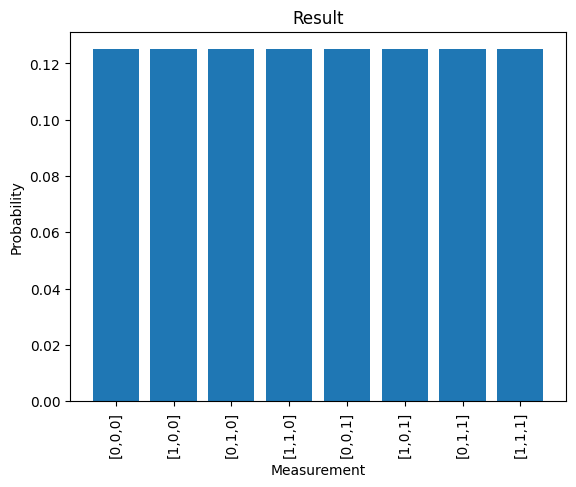

In [30]:
pyplot.bar(result.keys(), result.values())

pyplot.title("Result")
pyplot.xlabel("Measurement")
pyplot.ylabel("Probability")
pyplot.xticks(rotation = 90)

pyplot.show()

### **Some key points before we start.**
Let's discuss a few implementation details: 

1. If Alice needs to encode a `0` into a qubit, she simply needs to use the command `use q = Qubit();` since qubits automatically start in the $| 0 \rangle $ state.

1. If Alice needs to encode a `1` into a qubit, she needs to apply an `X` gate to the qubit since:
$$ X|0\rangle = | 1 \rangle$$

1. If Alice randomly chooses to prepare a qubit in a superposition state, she can use the Hadamard gate since:
$$ H|0\rangle = | + \rangle $$
$$ H|1\rangle = | - \rangle $$

1. If Bob randomly chooses to try taking a qubit out of superposition, he can also use the Hadamard gate since:
$$ H|+\rangle = | 0 \rangle $$
$$ H|-\rangle = | 1 \rangle $$

1. Alice will encode her key by using a qubit for each bit of the key and applying an X gate if that bit is 1. She will then randomly choose some qubits to put into superposition and "send" them to Bob. Bob will then randomly choose some qubits to, hopefully, take out of superposition. He will then measure the qubits to decode them into bits that now represent his key.

<br><br>

**Technical Note:** When we apply an H gate right before measuring, we can actually say that we are "measuring in a different basis"- the Hadamard basis. It turns out that applying an H gate is the same as if we just rotated our view of the Bloch sphere so the x-axis were pointing up and down. For this reason, we also call this the X Basis. You are not responsible for knowing this, but it is worth being aware of since a lot of the discussion about QKD involves bases.

The most important thing for you to know is that when someone says that Alice or Bob measures a certain qubit:
* "in the Z basis", this is exactly the same as saying Alice or Bob chooses to not put this qubit in superposition.
* "in the X basis", this is exactly the same as saying Alice or Bob chooses to put this qubit in superposition.

## **Part #2: Quantum Key Distribution (BB84)**
---

Now let's implement QKD. Specifically, we will write code that simulates the BB84 protocol between Alice and Bob such that:

* The initial key Alice wants to share with Bob is 5 bits long and is represented by the array returned by the operation `AliceBits()`.

* We represent Alice's choices about whether to put each qubit into superposition or not using an array returned by the operation `AliceChoices()`, where `AliceChoices()[i] = false` if she chooses not to put qubit `i` into superposition and `AliceChoices()[i] = true` if she does choose to put qubit `i` into superposition.

* We represent Bob's choices and key in a similar way: `BobChoices()[i] = false` or `BobChoices()[i] = true` and `BobBits()`.

### **Phases #1 - 2: Alice Sends the Key and Bob Receives It.**

We will be defining multiple operations here, but still using our 3 step process.

#### **1. Declare the operations in python.**

In [8]:
GetAliceBits : any = None
GetAliceChoices : any = None
GetBobChoices : any = None
SendAliceBob : any = None

#### **2. Create the operations in Q#.**


In [9]:
%%qsharp

operation GetAliceBits(keyLength: Int) : Int[] {

    return DrawMany(DrawRandomInt, keyLength, (0, 1));
}


operation GetAliceChoices(keyLength: Int) : Bool[] {

    return DrawMany(DrawRandomBool, keyLength, 0.5);
}


operation GetBobChoices(keyLength: Int) : Bool[] {

    return DrawMany(DrawRandomBool, keyLength, 0.5);
}


operation SendAliceBob(aliceBits : Int[], aliceChoices : Bool[], bobChoices : Bool[]) : Result[] {
    
    //Qubits initialized
    let keyLength = Length(aliceBits);
    use qs = Qubit[keyLength];

    // Alice encodes her key
    //========================
    for i in 0 .. Length(aliceBits) - 1{

        // Encode a 1 into the |1> state
        if aliceBits[i] == 1 {
            X(qs[i]);
        }

        // Put Alice's random choice of qubits into superposition
        if aliceChoices[i] {
            H(qs[i]);
        }
    }

    // Bob receives the key and
    // acts according to his choices of superpositions
    //=================================================
    for i in 0 .. Length(qs) - 1 {

        if bobChoices[i] {
            H(qs[i]);
        }
    }

    // Bob measures the qubits
    // to decode the key
    //========================
    return MultiM(qs);
}

#### **3. Simulate the operation in python and visualize.**

**Run the code below to simulate this exercise and see the distribution of measurement results.**

In [10]:
keyLength = 5

# STEPS #1 - 2
aliceBits = GetAliceBits.simulate(keyLength = keyLength)
aliceChoices = GetAliceChoices(keyLength = keyLength)

print("Alice's bits: " + str(aliceBits))
print("Alice's choices: " + str(aliceChoices))
print("\n")


# STEPS #3 - 5
bobChoices = GetBobChoices.simulate(keyLength = keyLength)
bobBits = SendAliceBob.simulate(aliceBits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)


print("Bob's choices: " + str(bobChoices))
print("Bob's bits: " + str(bobBits))
print("\n")

Alice's bits: [1, 1, 0, 1, 1]
Alice's choices: [True, False, False, True, False]


Bob's choices: [False, False, False, True, True]
Bob's bits: [0, 1, 0, 1, 1]




### **Phase #3: Alice "calls" Bob and they compare their choices for superposition bits to determine their new key.**

#### **Step #6: Alice and Bob compare notes and create their keys**

**Together**, let's write an operation that compares Alice's and Bob's choices for superposition bits and creates a key based on this.

##### **1. Declare the operation in python.**

Let's call it `GenerateKey`.

In [11]:
GenerateKey : any = None

##### **2. Create the operation in Q#.**

In [12]:
%%qsharp

operation GenerateKey(bits : Int[], aliceChoices : Bool[], bobChoices : Bool[]) : Int[] {

    // Count how many choices they agreed for
    mutable count = 0;
    for i in 0 .. Length(aliceChoices) - 1 {

        if aliceChoices[i] == bobChoices[i] {
            set count += 1;
        }
    }

    // Create the key
    mutable key = [0, size =  count];
    mutable keyID = 0;
    for i in 0 .. Length(aliceChoices) - 1 {

        if aliceChoices[i] == bobChoices[i] {
            set key w/= keyID <- bits[i];
            set keyID += 1;
        }
    }
    
    return  key;
}

#### **Step #7: Checking the shared key**

Now that Alice and Bob have discarded the bits where their choices were not the same, the remaining bits form a shared key. To verify that the Eve did not intercept and the protocol is secure, they share a chosen sample of their key and ensure that it matches. 

1. If they find that the shared sample from both Alice and Bob has matched, they discard these bits and use the rest of the shared key. 

2. If they find out that the shared sample does not match, they know that Eve has intercepted! They would need to start the process all over again.

<br>

**Together**, let's implement this as follows:
* Alice and Bob compare the first half of the key.
* If these bits are all the same, then return `true`.
* If any of these bits are different, then return `false`.

##### **1. Declare the operation in python.**

Let's call it `IsSecureKey`.

In [13]:
IsSecureKey : any = None

##### **2. Create the operation in Q#.**

In [14]:
%%qsharp

operation IsSecureKey(aliceKey : Int[], bobKey : Int[]) : Bool {

    for i in 0 .. Length(aliceKey) / 2 {

        if aliceKey[i] != bobKey[i]{
            return false;
        }
    }

    return true;
}

### **Running the Full Protocol**

In the space below, we combine all these components to run the protocol in full for Alice and Bob.

In [15]:
keyLength = 10

# STEPS #1 - 2
aliceBits = GetAliceBits.simulate(keyLength = keyLength)
aliceChoices = GetAliceChoices(keyLength = keyLength)

print("Alice's bits: " + str(aliceBits))
print("Alice's choices: " + str(aliceChoices))
print("\n")


# STEPS #3 - 5
bobChoices = GetBobChoices.simulate(keyLength = keyLength)
bobBits = SendAliceBob.simulate(aliceBits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)

print("Bob's choices: " + str(bobChoices))
print("Bob's bits: " + str(bobBits))
print("\n")


# STEP #6
aliceKey = GenerateKey.simulate(bits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)
bobKey = GenerateKey.simulate(bits = bobBits, aliceChoices = aliceChoices, bobChoices = bobChoices)

print("Alice's key: " + str(aliceKey))
print("Bob's key: " + str(bobKey))
print("\n")


# STEP #7
if IsSecureKey.simulate(aliceKey = aliceKey, bobKey = bobKey):

    aliceKey = aliceKey[len(aliceKey) // 2: ]
    bobKey = bobKey[len(bobKey) // 2: ]

    print("Key seems secure! They will now use: ")
    print("Alice's key: " + str(aliceKey))
    print("Bob's key: " + str(bobKey))

else:
    print("Alice and Bob have detected Eve's interception!")

Alice's bits: [0, 1, 1, 1, 0, 1, 1, 0, 0, 1]
Alice's choices: [True, True, False, False, True, True, False, False, True, False]


Bob's choices: [False, True, True, False, True, False, True, True, False, True]
Bob's bits: [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]


Alice's key: [1, 1, 0]
Bob's key: [1, 1, 0]


Key seems secure! They will now use: 
Alice's key: [1, 0]
Bob's key: [1, 0]


---

<center>

### **Congratulations! You have just implemented the Full BB84 protocol between Alice and Bob in Q#.**

</center>

---

### **Running on Real Hardware**


Now, let's run this on real hardware. Specifically, we will:
1. Connect to IonQ's trapped ion computer: `"ionq.qpu"`.
1. Submit the `SendAliceBob` operation for execution.
1. Check the status of this job.
1. Use the results when the results are ready and complete the protocol.
1. Before continuing, reconnect to the simulator instead of hardware.

#### **1. Connect to IonQ's trapped ion computer: "ionq.qpu".**

In [43]:
qsharp.azure.target("ionq.qpu")

Loading package Microsoft.Quantum.Providers.IonQ and dependencies...
Active target is now ionq.qpu


{'id': 'ionq.qpu', 'current_availability': {}, 'average_queue_time': 703}

#### **2. Submit the SendAliceBob operation for execution.**

In [44]:
keyLength = 10

# STEPS #1 - 2
aliceBits = GetAliceBits.simulate(keyLength = keyLength)
aliceChoices = GetAliceChoices(keyLength = keyLength)

print("Alice's bits: " + str(aliceBits))
print("Alice's choices: " + str(aliceChoices))
print("\n")


# STEPS #3 - 5
bobChoices = GetBobChoices.simulate(keyLength = keyLength)

Alice's bits: [0, 0, 0, 0, 1, 0, 1, 1, 1, 1]
Alice's choices: [False, True, True, True, True, True, True, True, False, True]




In [45]:
qsharp.azure.execute(SendAliceBob, aliceBits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices, shots = 10, jobName = "SendAliceBob", timeout = 1000)

Submitting SendAliceBob to target ionq.qpu...
Job successfully submitted.
   Job name: SendAliceBob
   Job ID: ab194367-3f7c-4b55-a59c-38c2bfedc1ad
Waiting up to 1000 seconds for Azure Quantum job to complete...
[20:37:11] Current job status: Waiting
[20:37:16] Current job status: Waiting
[20:37:21] Current job status: Waiting
[20:37:26] Current job status: Waiting
[20:37:31] Current job status: Waiting
[20:37:36] Current job status: Waiting
[20:37:41] Current job status: Waiting
[20:37:46] Current job status: Waiting
[20:37:51] Current job status: Waiting
[20:37:56] Current job status: Waiting
[20:38:01] Current job status: Waiting
[20:38:06] Current job status: Waiting
[20:38:11] Current job status: Waiting
[20:38:16] Current job status: Waiting
[20:38:21] Current job status: Waiting
[20:38:26] Current job status: Waiting
[20:38:31] Current job status: Waiting
[20:38:36] Current job status: Waiting
[20:38:41] Current job status: Waiting
[20:38:46] Current job status: Waiting
[20:38:5

TimeoutError: Timeout waiting for output

#### **3. Check the status of this job.**

In [46]:
qsharp.azure.status('ab194367-3f7c-4b55-a59c-38c2bfedc1ad')

TimeoutError: Timeout waiting for output

#### **4. Use the results when the results are ready and complete the protocol.**

In [ ]:
bobBits = pickResult(qsharp.azure.output('# FILL THIS WITH THE JOB ID PRINTED ABOVE

print("Bob's choices: " + str(bobChoices))
print("Bob's bits: " + str(bobBits))
print("\n")


# STEP #6
aliceKey = GenerateKey.simulate(bits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)
bobKey = GenerateKey.simulate(bits = bobBits, aliceChoices = aliceChoices, bobChoices = bobChoices)

print("Alice's key: " + str(aliceKey))
print("Bob's key: " + str(bobKey))
print("\n")


# STEP #7
if IsSecureKey.simulate(aliceKey = aliceKey, bobKey = bobKey):

    aliceKey = aliceKey[len(aliceKey) // 2: ]
    bobKey = bobKey[len(bobKey) // 2: ]

    print("Key seems secure! They will now use: ")
    print("Alice's key: " + str(aliceKey))
    print("Bob's key: " + str(bobKey))

else:
    print("Alice and Bob have detected Eve's interception!")

#### **5. Before continuing, reconnect to the simulator instead of hardware.**

In [4]:
qsharp.azure.target("ionq.simulator")

Loading package Microsoft.Quantum.Providers.IonQ and dependencies...
Active target is now ionq.simulator


{'id': 'ionq.simulator', 'current_availability': {}, 'average_queue_time': 2}

## **Part #3: Eve Intercepts [Code Provided]**
---

Now, suppose Eve intercepts the (encoded) message that Alice has meant to send to Bob. Eve measures the qubits in the same way Bob would do in **Step #4** and **Step #5** and then sends them to Bob.

<br>

**Run the first two cells to define all necessary operations. Then run the last cell to simulate the full protocol.**

### **Define the Operations**

In [5]:
SendAliceEve : any = None
SendEveBob : any = None

In [6]:
%%qsharp
operation SendAliceEve(aliceBits : Int[], aliceChoices : Bool[]) : Result[] {
    
    //Qubits initialized
    let keyLength = Length(aliceBits);
    use qs = Qubit[keyLength];

    // Alice encodes her key
    //========================
    for i in 0 .. Length(aliceBits) - 1{

        // Encode a 1 into the |1> state
        if aliceBits[i] == 1 {
            X(qs[i]);
        }

        // Put Alice's random choice of qubits into superposition
        if aliceChoices[i] {
            H(qs[i]);
        }
    }

    // Eve measures the qubits
    // to decode the key
    //========================
    return MultiM(qs);
}



operation SendEveBob(eveBits : Int[], bobChoices : Bool[]) : Result[] {
    
    //Qubits initialized
    let keyLength = Length(eveBits);
    use qs = Qubit[keyLength];

    // Eve encodes her measurements 
    // into qubits to send to Bob
    //==============================
    for i in 0 .. Length(eveBits) - 1{

        // Encode a 1 into the |1> state
        if eveBits[i] == 1 {
            X(qs[i]);
        }
    }


    // Bob receives the key unaware of Eve and
    // acts according to his choices of superpositions
    //=================================================
    for i in 0 .. Length(qs) - 1 {

        if bobChoices[i] {
            H(qs[i]);
        }
    }

    // Bob measures the qubits
    // to decode the key
    //========================
    return MultiM(qs);
}

### **Simulate BB84 with Interception**

In [16]:
keyLength = 8

# STEPS #1 - 2
aliceBits = GetAliceBits.simulate(keyLength = keyLength)
aliceChoices = GetAliceChoices(keyLength = keyLength)

print("Alice's bits: " + str(aliceBits))
print("Alice's choices: " + str(aliceChoices))
print("\n")


# STEPS #3 - 5
# EVE INTERCEPTS

print("Eve Intercepts!")
eveBits = SendAliceEve.simulate(aliceBits = aliceBits, aliceChoices = aliceChoices)

print("Eve measures: " + str(eveBits))
print("\n")

# EVE SENDS QUBITS TO BOB
bobChoices = GetBobChoices.simulate(keyLength = keyLength)
bobBits = SendEveBob.simulate(eveBits = eveBits, bobChoices = bobChoices)

print("Bob's choices: " + str(bobChoices))
print("Bob's bits: " + str(bobBits))
print("\n")


# STEP #6
aliceKey = GenerateKey.simulate(bits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)
bobKey = GenerateKey.simulate(bits = bobBits, aliceChoices = aliceChoices, bobChoices = bobChoices)

print("Alice's key: " + str(aliceKey))
print("Bob's key: " + str(bobKey))
print("\n")


# STEP #7
if IsSecureKey.simulate(aliceKey = aliceKey, bobKey = bobKey):

    aliceKey = aliceKey[len(aliceKey) // 2: ]
    bobKey = bobKey[len(bobKey) // 2: ]

    print("Key seems secure! They will now use: ")
    print("Alice's key: " + str(aliceKey))
    print("Bob's key: " + str(bobKey))

else:
    print("Alice and Bob have detected Eve's interception!")

Alice's bits: [1, 0, 0, 0, 1, 0, 1, 1]
Alice's choices: [True, True, True, True, True, True, False, True]


Eve Intercepts!
Eve measures: [1, 1, 0, 0, 1, 0, 1, 1]


Bob's choices: [True, True, False, True, True, False, False, True]
Bob's bits: [0, 0, 0, 0, 1, 0, 1, 1]


Alice's key: [1, 0, 0, 1, 1, 1]
Bob's key: [0, 0, 0, 1, 1, 1]


Alice and Bob have detected Eve's interception!


## **Part #4: The Full Protocol [Code Provided]**
---

In the cells below, we provide the full protocol, including Eve, so that you can see it altogether. This is broken into 4 pieces,

1. **Define the Operations**: You must run this code to ensure all necessary operations are defined.

2. **Simulate BB84**: This contains all the code in one cell to simulate BB84 from start to finish, with options to change the key length and if Eve intercepts or not.

3. **Execute BB84 with No Interception on a Target**: This contains all the code to execute BB84 from start to finish *with no Eve*. It is broken into 2 cells with the first one ending with submiting a job for execution that can then be picked back up on when the job is complete.

4. **Execute BB84 with Interception on a Target**: This contains all the code to execute BB84 from start to finish *with Eve*. It is broken into 3 cells with the first two cells ending with job submissions that can then be picked back up on when the jobs are complete.

### **1. Define the Operations**

**You must run this to use the code below.**

In [ ]:
GetAliceBits: any = None
GetAliceChoices: any = None
GetBobChoices: any = None

SendAliceBob: any = None
SendAliceEve: any = None
SendEveBob: any = None

GenerateKey: any = None
IsSecureKey: any = None

In [ ]:
%%qsharp

// Alice and Bob getting setup
//=============================
operation GetAliceBits(keyLength: Int) : Int[] {

    return DrawMany(DrawRandomInt, keyLength, (0, 1));
}



operation GetAliceChoices(keyLength: Int) : Bool[] {

    return DrawMany(DrawRandomBool, keyLength, 0.5);
}


operation GetBobChoices(keyLength: Int) : Bool[] {

    return DrawMany(DrawRandomBool, keyLength, 0.5);
}



// Alice, Bob, and potentially Eve communicating through the quantum channel
//===========================================================================

operation SendAliceBob(aliceBits : Int[], aliceChoices : Bool[], bobChoices : Bool[]) : Result[] {
    
    //Qubits initialized
    let keyLength = Length(aliceBits);
    use qs = Qubit[keyLength];

    // Alice encodes her key
    //========================
    for i in 0 .. Length(aliceBits) - 1{

        // Encode a 1 into the |1> state
        if aliceBits[i] == 1 {
            X(qs[i]);
        }

        // Put Alice's random choice of qubits into superposition
        if aliceChoices[i] {
            H(qs[i]);
        }
    }

    // Bob receives the key and
    // acts according to his choices of superpositions
    //=================================================
    for i in 0 .. Length(qs) - 1 {

        if bobChoices[i] {
            H(qs[i]);
        }
    }

    // Bob measures the qubits
    // to decode the key
    //========================
    return MultiM(qs);
}


operation SendAliceEve(aliceBits : Int[], aliceChoices : Bool[]) : Result[] {
    
    //Qubits initialized
    let keyLength = Length(aliceBits);
    use qs = Qubit[keyLength];

    // Alice encodes her key
    //========================
    for i in 0 .. Length(aliceBits) - 1{

        // Encode a 1 into the |1> state
        if aliceBits[i] == 1 {
            X(qs[i]);
        }

        // Put Alice's random choice of qubits into superposition
        if aliceChoices[i] {
            H(qs[i]);
        }
    }

    // Eve measures the qubits
    // to decode the key
    //========================
    return MultiM(qs);
}



operation SendEveBob(eveBits : Int[], bobChoices : Bool[]) : Result[] {
    
    //Qubits initialized
    let keyLength = Length(eveBits);
    use qs = Qubit[keyLength];

    // Eve encodes her measurements 
    // into qubits to send to Bob
    //==============================
    for i in 0 .. Length(eveBits) - 1{

        // Encode a 1 into the |1> state
        if eveBits[i] == 1 {
            X(qs[i]);
        }
    }


    // Bob receives the key unaware of Eve and
    // acts according to his choices of superpositions
    //=================================================
    for i in 0 .. Length(qs) - 1 {

        if bobChoices[i] {
            H(qs[i]);
        }
    }

    // Bob measures the qubits
    // to decode the key
    //========================
    return MultiM(qs);
}



// Alice and Bob comparing and generating keys
//=============================================
operation GenerateKey(bits : Int[], aliceChoices : Bool[], bobChoices : Bool[]) : Int[] {

    // Count how many choices they agreed on
    //=======================================
    mutable count = 0;
    for i in 0 .. Length(aliceChoices) - 1 {

        if aliceChoices[i] == bobChoices[i] {
            set count += 1;
        }
    }

    // Create the key
    //================
    mutable key = [0, size = count];
    mutable keyID = 0;
    for i in 0 .. Length(aliceChoices) - 1 {

        if aliceChoices[i] == bobChoices[i] {
            set key w/= keyID <- bits[i];
            set keyID += 1;
        }
    }
    
    return key;
}

operation IsSecureKey(aliceKey : Int[], bobKey : Int[]) : Bool {

    // Check the first half of the keys
    // to make sure they agree
    //==================================
    for i in 0 .. Length(aliceKey) / 2 {

        if aliceKey[i] != bobKey[i]{
            return false;
        }
    }

    return true;
}

### **2. Simulate BB84**

In [ ]:
keyLength = 5
eveIntercepts = False


# STEPS #1 - 2
aliceBits = GetAliceBits.simulate(keyLength = keyLength)
aliceChoices = GetAliceChoices(keyLength = keyLength)
bobChoices = GetBobChoices.simulate(keyLength = keyLength)

print("Alice's bits: " + str(aliceBits))
print("Alice's choices: " + str(aliceChoices))
print("\n")


# STEPS #3 - 5
if eveIntercepts:
    # EVE INTERCEPTS
    print("Eve Intercepts!")
    eveBits = SendAliceEve.simulate(aliceBits = aliceBits, aliceChoices = aliceChoices)

    print("Eve measures: " + str(eveBits))
    print("\n")

    # EVE SENDS QUBITS TO BOB
    bobBits = SendEveBob.simulate(eveBits = eveBits, bobChoices = bobChoices)

else:
    bobBits = SendAliceBob.simulate(aliceBits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)

print("Bob's choices: " + str(bobChoices))
print("Bob's bits: " + str(bobBits))
print("\n")


# STEP #6
aliceKey = GenerateKey.simulate(bits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)
bobKey = GenerateKey.simulate(bits = bobBits, aliceChoices = aliceChoices, bobChoices = bobChoices)

print("Alice's key: " + str(aliceKey))
print("Bob's key: " + str(bobKey))
print("\n")


# STEP #7
if IsSecureKey.simulate(aliceKey = aliceKey, bobKey = bobKey):

    aliceKey = aliceKey[len(aliceKey) // 2: ]
    bobKey = bobKey[len(bobKey) // 2: ]

    print("Key seems secure! They will now use: ")
    print("Alice's key: " + str(aliceKey))
    print("Bob's key: " + str(bobKey))

else:
    print("Alice and Bob have detected Eve's interception!")

### **3. Execute BB84 with No Interception on a Target**

In [ ]:
keyLength = 5

# STEPS #1 - 2
aliceBits = GetAliceBits.simulate(keyLength = keyLength)
aliceChoices = GetAliceChoices(keyLength = keyLength)
bobChoices = GetBobChoices.simulate(keyLength = keyLength)

print("Alice's bits: " + str(aliceBits))
print("Alice's choices: " + str(aliceChoices))
print("\n")

In [ ]:
qsharp.azure.execute(SendEveBob, eveBits = eveBits, bobChoices = bobChoices, shots = 10, timeout = 1000)

In [ ]:
bobBits = pickResult(qsharp.azure.output(' # COMPLETE THIS LINE WITH THE JOB ID PRINTED ABOVE

print("Bob's choices: " + str(bobChoices))
print("Bob's bits: " + str(bobBits))
print("\n")


# STEP #6
aliceKey = GenerateKey.simulate(bits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)
bobKey = GenerateKey.simulate(bits = bobBits, aliceChoices = aliceChoices, bobChoices = bobChoices)

print("Alice's key: " + str(aliceKey))
print("Bob's key: " + str(bobKey))
print("\n")


# STEP #7
if IsSecureKey.simulate(aliceKey = aliceKey, bobKey = bobKey):

    aliceKey = aliceKey[len(aliceKey) // 2: ]
    bobKey = bobKey[len(bobKey) // 2: ]

    print("Key seems secure! They will now use: ")
    print("Alice's key: " + str(aliceKey))
    print("Bob's key: " + str(bobKey))

else:
    print("Alice and Bob have detected Eve's interception!")

### **4. Execute BB84 with Interception on a Target**

In [ ]:
keyLength = 5

# STEPS #1 - 2
aliceBits = GetAliceBits.simulate(keyLength = keyLength)
aliceChoices = GetAliceChoices(keyLength = keyLength)
bobChoices = GetBobChoices.simulate(keyLength = keyLength)

print("Alice's bits: " + str(aliceBits))
print("Alice's choices: " + str(aliceChoices))
print("\n")

# EVE INTERCEPTS
print("Eve Intercepts!")

In [ ]:
qsharp.azure.execute(SendAliceEve, aliceBits = aliceBits, aliceChoices = aliceChoices, shots = 10, timeout = 1000)

In [ ]:
eveBits = pickResult(qsharp.azure.output(' # COMPLETE THIS LINE WITH THE JOB ID PRINTED ABOVE

print("Eve measures: " + str(eveBits))
print("\n")

In [ ]:
# EVE SENDS QUBITS TO BOB
qsharp.azure.execute(SendEveBob, eveBits = eveBits, bobChoices = bobChoices, shots = 10, timeout = 1000)

In [ ]:
bobBits = pickResult(qsharp.azure.output(' # COMPLETE THIS LINE WITH THE JOB ID PRINTED ABOVE

print("Bob's choices: " + str(bobChoices))
print("Bob's bits: " + str(bobBits))
print("\n")


# STEP #6
aliceKey = GenerateKey.simulate(bits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)
bobKey = GenerateKey.simulate(bits = bobBits, aliceChoices = aliceChoices, bobChoices = bobChoices)

print("Alice's key: " + str(aliceKey))
print("Bob's key: " + str(bobKey))
print("\n")


# STEP #7
if IsSecureKey.simulate(aliceKey = aliceKey, bobKey = bobKey):

    aliceKey = aliceKey[len(aliceKey) // 2: ]
    bobKey = bobKey[len(bobKey) // 2: ]

    print("Key seems secure! They will now use: ")
    print("Alice's key: " + str(aliceKey))
    print("Bob's key: " + str(bobKey))

else:
    print("Alice and Bob have detected Eve's interception!")

# End of Notebook
---
© 2023 The Coding School, All rights reserved